<a href="https://colab.research.google.com/github/Oyindamola011/-Future_DS_03-/blob/main/Road_Accident_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install pandas if you haven't already
!pip install pandas

import folium
from folium.plugins import HeatMap
import pandas as pd # Import pandas

# Create base map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=12)

# Assuming your data is in a Excel file named 'Road Accidents Data.xlsx'
# Replace 'Road Accidents Data.xlsx'  with the actual path to your data file
try:
    df = pd.read_excel("/content/Road Accident Data.xlsx")
except FileNotFoundError:
    print("Error: 'accidents.csv' not found. Please provide the correct path to your data file.")
    # You might want to exit or handle this error appropriately
    # For demonstration, let's create a sample DataFrame if the file is not found
    print("Creating a sample DataFrame for demonstration.")
    data = {'Latitude': [51.5, 51.51, 51.49],
            'Longitude': [-0.1, -0.13, -0.15]}
    df = pd.DataFrame(data)


# Prepare heat data
# Check if 'Latitude' and 'Longitude' columns exist before accessing them
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    heat_data = [[row["Latitude"], row["Longitude"]] for idx, row in df.iterrows()]

    # Add heatmap
    HeatMap(heat_data).add_to(m)

    # Save map
    m.save("accident_hotspot_map.html")
else:
    print("Error: DataFrame does not contain 'Latitude' or 'Longitude' columns.")

In [3]:
# Top weather conditions
df['Weather_Conditions'].value_counts()

# Top lighting conditions
df['Light_Conditions'].value_counts()

# Road surface impact on severity
pd.crosstab(df['Road_Surface_Conditions'], df['Accident_Severity'])

Accident_Severity,Fatal,Fetal,Serious,Slight
Road_Surface_Conditions,,,,
Dry,2658,35,28692,177582
Flood over 3cm. deep,13,0,53,308
Frost or ice,116,0,1259,10703
Snow,28,0,443,4287
Wet or damp,1089,14,10293,70400


<Axes: title={'center': 'Accidents by Hour of Day'}, xlabel='Hour'>

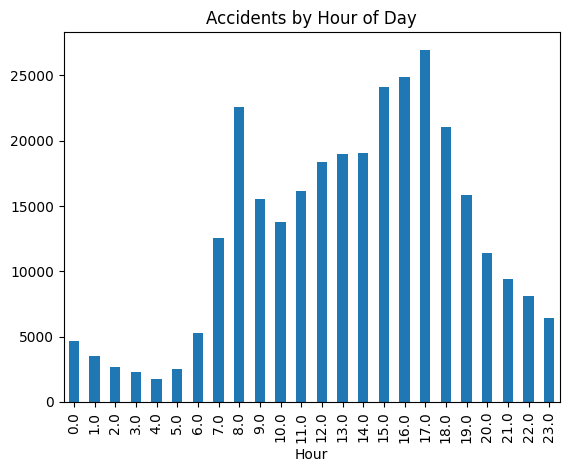

In [5]:
# Extract hour from time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Accidents per hour
df.groupby('Hour').size().plot(kind='bar', title="Accidents by Hour of Day")

In [6]:
df['Junction_Detail'].value_counts().head(5)

,count
Junction_Detail,
Not at junction or within 20 metres,123094
T or staggered junction,96718
Crossroads,29948
Roundabout,27264
Private drive or entrance,10875


In [9]:
pd.crosstab(df['Junction_Detail'], df['Accident_Severity']).sort_values(by='Serious', ascending=False).head(5)

Accident_Severity,Fatal,Fetal,Serious,Slight
Junction_Detail,,,,
Not at junction or within 20 metres,2404,8,18964,101718
T or staggered junction,866,20,12341,83491
Crossroads,295,13,3528,26112
Roundabout,90,2,2236,24936
Private drive or entrance,96,1,1451,9327


In [11]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# Assuming df is already loaded as in the previous cells

# Convert Time to Hour
# Use errors='coerce' to handle potential parsing errors
# This line seems to be repeated from a later cell, ensure it's only executed once if possible
# df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour


# Widgets
severity_filter = widgets.SelectMultiple(
    options=df['Accident_Severity'].unique(),
    # Convert the numpy array to a tuple for the value parameter
    value=tuple(df['Accident_Severity'].unique()),
    description='Severity'
)

def update_plot(severity):
    filtered = df[df['Accident_Severity'].isin(severity)]
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    filtered['Weather_Conditions'].value_counts().head(5).plot(kind='bar')
    plt.title("Top Weather Conditions")

    plt.subplot(1, 2, 2)
    # Handle potential NaN values in 'Hour' before converting to int
    filtered['Hour'].dropna().astype(int).value_counts().sort_index().plot(kind='line')
    plt.title("Accidents by Hour")
    plt.show()

# Display the widget
display(severity_filter)

# Interact with the widget
widgets.interact(update_plot, severity=severity_filter)

SelectMultiple(description='Severity', index=(0, 1, 2, 3), options=('Serious', 'Slight', 'Fetal', 'Fatal'), va…

interactive(children=(SelectMultiple(description='Severity', index=(0, 1, 2, 3), options=('Serious', 'Slight',…

<function __main__.update_plot(severity)>

In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Assuming df is already loaded as in the previous cells

# Convert Time to Hour
# Use errors='coerce' to handle potential parsing errors
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Filter Widgets
severity_widget = widgets.SelectMultiple(
    options=tuple(df['Accident_Severity'].unique()), # Convert to tuple
    value=tuple(df['Accident_Severity'].unique()),   # Convert to tuple
    description='Severity'
)

weather_widget = widgets.SelectMultiple(
    options=tuple(df['Weather_Conditions'].unique()), # Convert to tuple
    value=tuple(df['Weather_Conditions'].unique()),   # Convert to tuple
    description='Weather'
)

# Display Widgets
display(severity_widget, weather_widget)

# Function to update plots
def update_plots(severity, weather):
    filtered = df[df['Accident_Severity'].isin(severity) & df['Weather_Conditions'].isin(weather)]

    # Clear previous plots
    plt.clf()

    # Plot 1: Weather Count
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=filtered, y='Weather_Conditions')
    plt.title("Weather Conditions")

    # Plot 2: Accidents by Hour
    plt.subplot(1, 2, 2)
    sns.histplot(data=filtered, x='Hour', bins=24, kde=False)
    plt.title("Accidents by Hour of Day")

    plt.tight_layout()
    plt.show()

# Interact
widgets.interact(update_plots, severity=severity_widget, weather=weather_widget)

SelectMultiple(description='Severity', index=(0, 1, 2, 3), options=('Serious', 'Slight', 'Fetal', 'Fatal'), va…

SelectMultiple(description='Weather', index=(0, 1, 2, 3, 4, 5, 6, 7), options=('Fine no high winds', 'Other', …

interactive(children=(SelectMultiple(description='Severity', index=(0, 1, 2, 3), options=('Serious', 'Slight',…

<function __main__.update_plots(severity, weather)>

In [20]:
{
    "metadata": {
        "widgets": {
            "state": {}
        }
    }
}

{'metadata': {'widgets': {'state': {}}}}